#### Import Python modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

##### Load data from CSV files

There are 2 CSV files - observations and species

In [2]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


##### Explore the Species data

In [4]:
print('There are {} species in this data'.format(species.scientific_name.nunique()))

There are 5541 species in this data


In [5]:
print('There are {} categories of species and they are : {}'.format(species.category.nunique(), species.category.unique()))

There are 7 categories of species and they are : ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [6]:
print('Here is breakdown of the number of animals/plants per species: \n\n{}'.format(species.groupby('category').size()))

Here is breakdown of the number of animals/plants per species: 

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


##### Explore the Observations Data

In [7]:
print('There are {} parks in this data and they are : \n\n {}'.format(observations.park_name.nunique(), observations.park_name.unique()))

There are 4 parks in this data and they are : 

 ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [8]:
print("Here is a breakdown of the total number of sightings in each park: \n\n{}".format(observations.groupby('park_name').observations.sum()))

Here is a breakdown of the total number of sightings in each park: 

park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64


##### Replace the NaN values of the Conservation Status in the Species dataframe with "No Intervention" and then display the breakdown of animal/plant by status

In [9]:
species.conservation_status.fillna('No Intervention', inplace = True)
conservation_status = species.groupby('conservation_status').size()
print('Here is a breakdown of number of animals/plants in each conservation status category: \n\n {}'.format(conservation_status))

Here is a breakdown of number of animals/plants in each conservation status category: 

 conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64


##### Pie chart of animals/plants with a conservation status which is not "No Intervention" by category of species

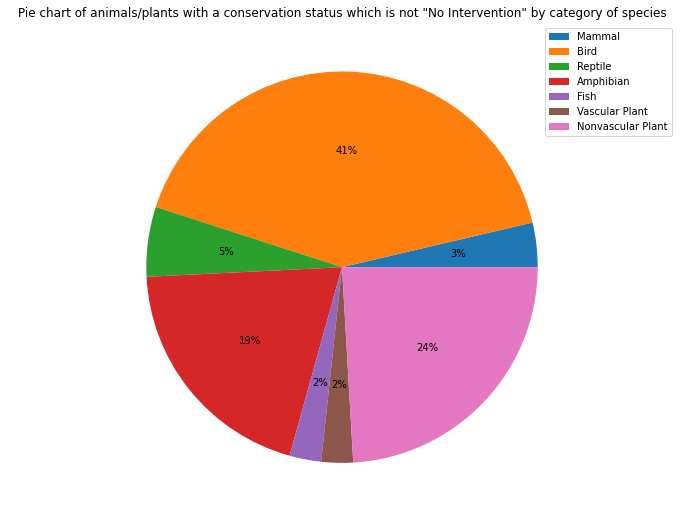

In [47]:
conservation_status = species[species.conservation_status != 'No Intervention']
plt.figure(figsize = (12, 9))
ax = plt.subplot()
plt.axis('equal')
plt.title('Pie chart of animals/plants with a conservation status which is not "No Intervention" by category of species')
plt.pie(x = conservation_status.groupby('category').size(), autopct = '%1d%%')
plt.legend(conservation_status.category.unique())
plt.show()

##### Analysis: It appears that, of the animals/plants which required some form of conservation intervention, birds make up a much larger percentage that other categories of species. 

##### Bar graph of number of animals/plants in each category of conservation status broken down by categort of species

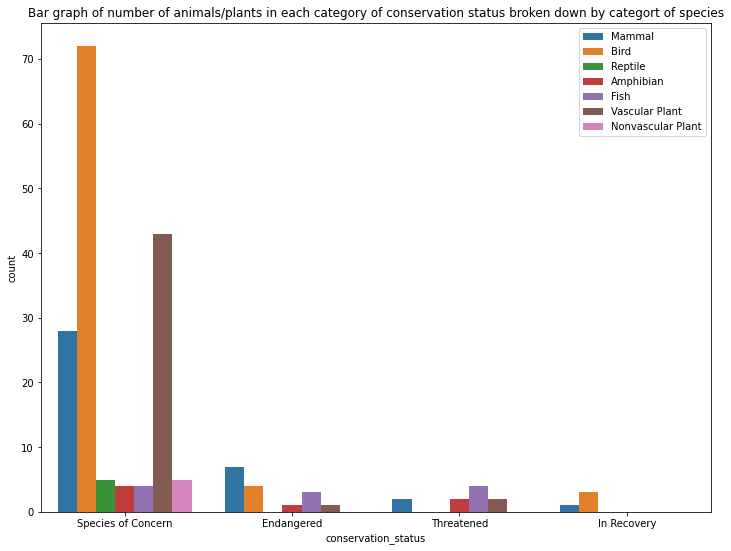

In [46]:
plt.figure(figsize = (12, 9))
ax = plt.subplot()
plt.title('Bar graph of number of animals/plants in each category of conservation status broken down by categort of species')
sns.countplot(data = conservation_status, x = 'conservation_status', hue = 'category')
plt.legend(loc = 'upper right')
plt.show()

##### Add "protected" and "category" columns to the observations to dataframe to indicate whether or not that animal/plant is proetcted

In [40]:
np_array_observed = observations.scientific_name.to_numpy()
protected = []
category = []
for name in np_array_observed:
    animal = species[species.scientific_name == name]
    if animal.conservation_status.values[0] != 'No Intervention':
        protected.append(True)
        category.append(animal.category.values[0])
    else:
        protected.append(False)
        category.append(animal.category.values[0])
observations['protected'] = protected
observations['category'] = category
observations.head()

,scientific_name,park_name,observations,protected,category
0,Vicia benghalensis,Great Smoky Mountains National Park,68,False,Vascular Plant
1,Neovison vison,Great Smoky Mountains National Park,77,False,Mammal
2,Prunus subcordata,Yosemite National Park,138,False,Vascular Plant
3,Abutilon theophrasti,Bryce National Park,84,False,Vascular Plant
4,Githopsis specularioides,Great Smoky Mountains National Park,85,False,Vascular Plant


##### Breakdown of total sighting by procted or not

In [41]:
print('Breakdwon of total sightings by protected or not: \n\n{}'.format(observations.groupby('protected').observations.sum()))

Breakdwon of total sightings by protected or not: 

protected
False    3225444
True       89295
Name: observations, dtype: int64


##### Bar graph of average number of sightings per park with a hue of whether or not they are protected

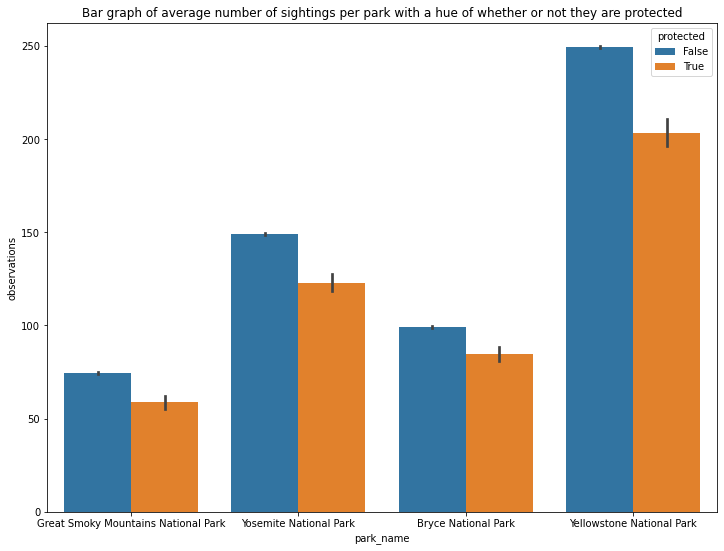

In [45]:
plt.figure(figsize = (12, 9))
ax = plt.subplot()
plt.title('Bar graph of average number of sightings per park with a hue of whether or not they are protected')
sns.barplot(data = observations, x = 'park_name', y = 'observations', hue = 'protected')
plt.show()

##### Analysis: This graph indicates that, on average, when a protected animal/plant is sighted, it is sighted less often than non-protected animals

##### Bar graph of average number of sightings per park with a hue of category of animal/plant

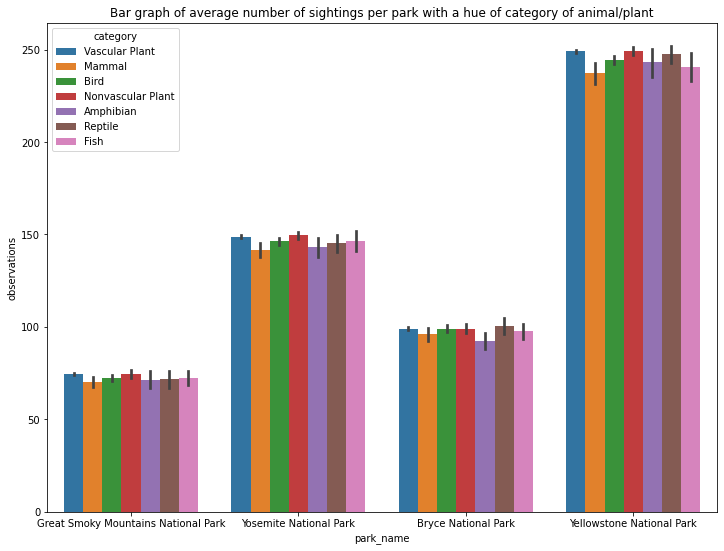

In [44]:
plt.figure(figsize = (12, 9))
ax = plt.subplot()
plt.title('Bar graph of average number of sightings per park with a hue of category of animal/plant')
sns.barplot(data = observations, x = 'park_name', y = 'observations', hue = 'category')
plt.show()

##### Bar graph of sightings of protected animals/plants, broken down by park and category

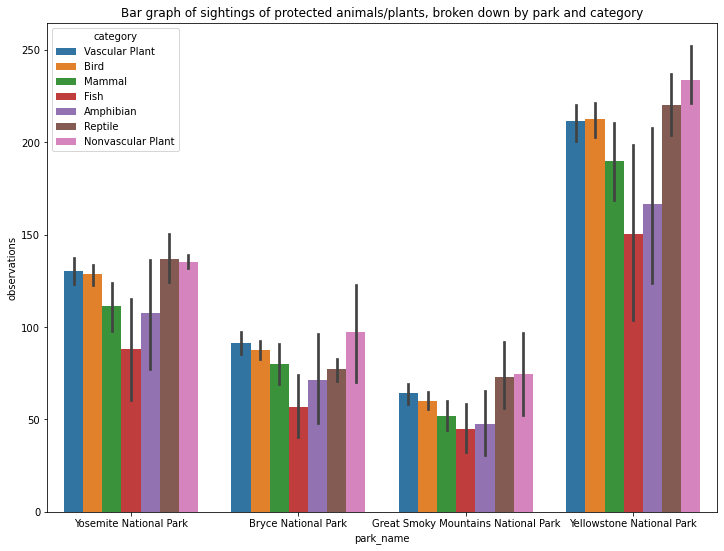

In [53]:
protected_observations = observations[observations.protected == True]
plt.figure(figsize = (12, 9))
ax = plt.subplot()
plt.title('Bar graph of sightings of protected animals/plants, broken down by park and category')
sns.barplot(data = protected_observations, x = 'park_name', y = 'observations', hue = 'category')
plt.show()

##### Analysis: It appears that Yellowstone National Park has the most sighting of animals/plants in general and specifically protected wildlife. 